[Reference] https://github.com/sahutkarsh/NSGA-II

## Import Libraries

In [1]:
import math
import random
import matplotlib.pyplot as plt
%matplotlib inline

## Objective Functions To Be Optimized

In [2]:
def objective1(x):
    y = -x**3
    return y

In [3]:
def objective2(x):
    y = -(x-2)**2
    return y

## Parameter Initialization

In [4]:
population = 25
max_gen = 501
min_value = -100
max_value = 100

## Helper Methods

In [5]:
a = []
a.append(1)
a.append(100)
a.append(10000)
print(a)

[1, 100, 10000]


In [6]:
# 원소 a와 list를 넘기면, 해당 list에서 a의 인덱스를 반환해주는 함수
# 없으면 -1 반환
def index_locator(a, list):
    for i in range(0, len(list)):
        if list[i] == a:
            return i
    return -1

In [7]:
# list1의 원소들을 values 기준으로 오름차순으로 정렬한 값들의 '인덱스' 리스트를 반환.
# list1 은 인덱스로 구성
def sort_by_values(list1, values):
    sorted_list = []
    while (len(sorted_list) != len(list1)):
        # values에서 최소값에 해당하는 인덱스를 뽑아서, 해당 '인덱스'를 sorted_list에 추가.
        if index_locator(min(values), values) in list1:
            sorted_list.append(index_locator(min(values), values))
        # 위에서 넣은 최소값은, 값을 inf로 설정해서 다시 뽑히지 않도록
        values[index_locator(min(values), values)] = math.inf
    return sorted_list

In [18]:
def crowding_distance(values1, values2, front):
    distance = [0 for i in range(0, len(front))]
    sorted1 = sort_by_values(front, values1[:])
    sorted2 = sort_by_values(front, values2[:])
    distance[0] = 9999999999999999
    distance[len(front) - 1] = 9999999999999999
    for k in range(1, len(front)-1):
        distance[k] = distance[k] + (values1[sorted1[k+1]] - values2[sorted1[k-1]]) / (max(values1) - min(values1))
    for k in range(1, len(front)-1):
        distance[k] = distance[k] + (values1[sorted2[k+1]] - values2[sorted2[k-1]]) / (max(values2) - min(values2))
    return distance

## Genetic Operator Functions

In [9]:
def crossover(a, b):
    r = random.random()
    if r > 0.5:
        return mutation((a+b)/2)
    else:
        return mutation((a-b)/2)

In [10]:
def mutation(solution):
    mutation_prob = random.random()   #  floating point number in the range [0.0, 1.0).
    if mutation_prob < 1:
        solution = min_value + (max_value-min_value)*random.random()
    return solution

## Algorithm

In [11]:
def non_dominated_sorting_algorithm(values1, values2):
    S = [[] for i in range(0, len(values1))]   # dominates list -> dominate하는 점의 index들을 저장함.
    front = [[]]
    n = [0 for i in range(0, len(values1))]  # domination_count
    rank = [0 for i in range(0, len(values1))]
    
    # 첫번째 iteration: front[0]을 찾기 위함.
    for p in range(0, len(values1)):
        S[p] = []
        n[p] = 0
        # 각각의 점 p에서, 모든 점에 대해 iterate
        for q in range(0, len(values1)):
            # p가 q를 dominate 하면,
            if (values1[p] > values1[q] and values2[p] > values2[q]) or (values1[p] >= values1[q] and values2[p] > values2[q]) or (values1[p] > values1[q] and values2[p] >= values2[q]):
                if q not in S[p]: 
                    S[p].append(q)  # S[p] 즉, dominates list에 안들어가있다면 추가함.
            # p가 q에 의해 dominate 된다면,
            elif (values1[q] > values1[p] and values2[q] > values2[p]) or (values1[q] >= values1[p] and values2[q] > values2[p]) or (values1[q] > values1[p] and values2[q] >= values2[p]):
                n[p] = n[p] + 1  # domination_count += 1
        # front 안정해진 상태에서 iterate했는데, n[p] 즉 domination_count = 0이면, 이 점은 rank 0.
        if n[p] == 0:
            rank[p] = 0   # 이 점의 rank는 0이 됨.
            if p not in front[0]:  # 이 점 p의 rank는 0이므로, front[0]에 p를 추가함
                front[0].append(p)
                
    # 이제, front[0]. 즉 첫번재 front를 기준으로 front를 하나씩 만들어감.
    i = 0
    while(front[i] != []):  # front[0]이 비어있지 않으므로, front[1]을 만듦. -> front[2], ...
        Q = []  # 이번 반복문에서 만들 front인 Q.
        for p in front[i]:  # front[0]에 있는 점들에 대해
            for q in S[p]:   # front[0]에 있는 점이 dominate하는 점들 q에 대해
                n[q] = n[q] - 1  # domination_count를 하나씩 빼줌
                if (n[q] == 0):   # domination_count가 0이 되면, 
                    rank[q] = i+1   # 이 점의 rank는 i 바로 다음. 즉 i=0에서 돌고있다면 1. 즉 바로 다음 rank가 됨.
                    if q not in Q:
                        Q.append(q)   # 지금 만들고있는 front인 Q에 q를 넣어줌.
        i = i + 1
        front.append(Q)

    # 마지막 front를 만든 후, front[i]가 비어있지 않으므로 다음 Q도 만들어내는데, 빈 리스트로 끝난 후 front[]에 추가됨.
    # 따라사 front에 마지막에 추가된 원소는 삭제해줌
    del front[len(front) - 1]  

    return front

# Final Implementation Function

In [27]:
def nsga2(population, max_gen, min_value, max_value):
    
    gen_no = 0
    # solution 초기화는 min_value와 max_value 사이의 랜덤한 실수
    solution = [min_value + (max_value - min_value)*random.random() for i in range(0, population)]
    
    while (gen_no < max_gen):
        objective1_values = [objective1(solution[i]) for i in range(0, population)]
        objective2_values = [objective2(solution[i]) for i in range(0, population)]        
        
        # Non-dominated sorting
        non_dominated_sorted_solution = non_dominated_sorting_algorithm(objective1_values[:], objective2_values[:])
        print('Best Front for Generation:', gen_no)
        for values in non_dominated_sorted_solution[0]:
            print(round(solution[values], 3), end=" ")
        print("\n")
        
        # Crowding_distance 구하기
        crowding_distance_values = []
        for i in range(0, len(non_dominated_sorted_solution)):
            # 각각의 front i 에서, 해당 원소들에 대한 crowding_distance를 구함
            crowding_distance_values.append(crowding_distance(objective1_values[:], objective2_values[:], non_dominated_sorted_solution[i][:]))
        
        solution2 = solution[:]

        # crossover
        while (len(solution2) != 2*population):
            a1 = random.randint(0, population-1)
            b1 = random.randint(0, population-1)
            solution2.append(crossover(solution[a1], solution[b1]))
        
        objective1_values2 = [objective1(solution2[i]) for i in range(0, 2*population)]
        objective2_values2 = [objective2(solution2[i]) for i in range(0, 2*population)]
        
        # Non-dominated sorting & crowding distance sorting
        non_dominated_sorted_solution2 = non_dominated_sorting_algorithm(objective1_values2[:],objective2_values2[:])
        crowding_distance_values2=[]
        for i in range(0,len(non_dominated_sorted_solution2)):  # 각각의 front i에 대해
            crowding_distance_values2.append(crowding_distance(objective1_values2[:], objective2_values2[:], non_dominated_sorted_solution2[i][:]))

            new_solution= []
        for i in range(0,len(non_dominated_sorted_solution2)):
            non_dominated_sorted_solution2_1 = [index_locator(non_dominated_sorted_solution2[i][j],non_dominated_sorted_solution2[i] ) for j in range(0,len(non_dominated_sorted_solution2[i]))]
            front22 = sort_by_values(non_dominated_sorted_solution2_1[:], crowding_distance_values2[i][:])
            front = [non_dominated_sorted_solution2[i][front22[j]] for j in range(0,len(non_dominated_sorted_solution2[i]))]
            front.reverse()  # 오름차순 정렬 -> 내림차순 정렬 (crowding_distance가 큰 것부터 뽑도록. -> solution의 diversity 확보. spread the solutions)
            for value in front:
                new_solution.append(value)
                if(len(new_solution)==population):
                    break
            if (len(new_solution) == population):
                break
        solution = [solution2[i] for i in new_solution]
        gen_no = gen_no + 1
    return [objective1_values, objective2_values, solution]

## Curve Plotter

In [28]:
def non_dominating_curve_plotter(objective1_values, objective2_values):
    plt.figure(figsize=(15,8))
    
    objective1 = [i * -1 for i in objective1_values]
    objective2 = [j * -1 for j in objective2_values]
    
    plt.xlabel('Objective Function 1', fontsize=15)
    plt.ylabel('Objective Function 2', fontsize=15)
    plt.scatter(objective1, objective2, c='red', s=25)

## Operation

In [29]:
objective1_values, objective2_values, solution = nsga2(population,max_gen,min_value,max_value)

Best Front for Generation: 0
-95.347 -31.977 -17.92 -10.595 -31.062 6.25 -53.339 -22.743 -75.44 -65.142 -4.337 -10.076 

Best Front for Generation: 1
4.997 -95.347 -31.977 -17.92 -10.595 -31.062 -53.339 -22.743 -75.44 -65.142 -4.337 -10.076 -5.014 -52.843 -65.26 -82.163 -57.202 -84.385 -2.184 -85.69 -43.618 -63.348 -76.574 -54.046 

Best Front for Generation: 2
-4.025 4.997 -95.347 -31.977 -17.92 -10.595 -31.062 -53.339 -22.743 -75.44 -65.142 -4.337 -10.076 -5.014 -52.843 -65.26 -82.163 -57.202 -84.385 -2.184 -85.69 -43.618 -63.348 -76.574 -54.046 

Best Front for Generation: 3
-4.426 -4.025 -95.347 -31.977 -17.92 -10.595 -31.062 -53.339 -22.743 -75.44 -65.142 -4.337 -10.076 -5.014 -52.843 -65.26 -82.163 -57.202 -84.385 -2.184 -85.69 -43.618 -63.348 -76.574 -54.046 

Best Front for Generation: 4
-88.89 -4.426 -4.025 -95.347 -31.977 -17.92 -10.595 -31.062 -53.339 -22.743 -75.44 -65.142 -4.337 -10.076 -5.014 -52.843 -65.26 -82.163 -57.202 -84.385 -2.184 -85.69 -43.618 -63.348 -76.574 

B

-85.429 -49.87 -75.707 -4.32 -17.557 -72.322 -89.043 -87.215 -79.193 -23.094 -60.999 -63.45 -61.571 -43.297 -44.399 -92.783 -3.459 -35.468 -13.444 -50.826 -77.007 -37.908 -2.984 0.385 -17.687 

Best Front for Generation: 52
-69.087 -85.429 -49.87 -75.707 -4.32 -17.557 -72.322 -89.043 -87.215 -79.193 -23.094 -60.999 -63.45 -61.571 -43.297 -44.399 -92.783 -3.459 -35.468 -13.444 -50.826 -77.007 -37.908 -2.984 0.385 

Best Front for Generation: 53
-96.186 -69.087 -85.429 -49.87 -75.707 -4.32 -17.557 -72.322 -89.043 -87.215 -79.193 -23.094 -60.999 -63.45 -61.571 -43.297 -44.399 -92.783 -3.459 -35.468 -13.444 -50.826 -77.007 -37.908 -2.984 

Best Front for Generation: 54
-54.86 -96.186 -69.087 -85.429 -49.87 -75.707 -4.32 -17.557 -72.322 -89.043 -87.215 -79.193 -23.094 -60.999 -63.45 -61.571 -43.297 -44.399 -92.783 -3.459 -35.468 -13.444 -50.826 -77.007 -37.908 

Best Front for Generation: 55
-2.642 -54.86 -96.186 -69.087 -85.429 -49.87 -75.707 -4.32 -17.557 -72.322 -89.043 -87.215 -79.193 -

-64.895 1.811 -92.019 -77.887 -34.246 -77.979 -53.768 -5.717 -2.816 -27.829 -65.552 -85.817 -17.922 -3.981 -81.276 -24.686 -45.037 1.141 -74.226 -64.681 -92.825 -71.904 -44.369 -52.401 -23.176 

Best Front for Generation: 105
-64.814 -64.895 1.811 -92.019 -77.887 -34.246 -77.979 -53.768 -5.717 -2.816 -27.829 -65.552 -85.817 -17.922 -3.981 -81.276 -24.686 -45.037 1.141 -74.226 -64.681 -92.825 -71.904 -44.369 -52.401 

Best Front for Generation: 106
-80.244 -64.814 -64.895 1.811 -92.019 -77.887 -34.246 -77.979 -53.768 -5.717 -2.816 -27.829 -65.552 -85.817 -17.922 -3.981 -81.276 -24.686 -45.037 1.141 -74.226 -64.681 -92.825 -71.904 -44.369 

Best Front for Generation: 107
-58.755 -80.244 -64.814 -64.895 1.811 -92.019 -77.887 -34.246 -77.979 -53.768 -5.717 -2.816 -27.829 -65.552 -85.817 -17.922 -3.981 -81.276 -24.686 -45.037 1.141 -74.226 -64.681 -92.825 -71.904 

Best Front for Generation: 108
-18.12 -58.755 -80.244 -64.814 -64.895 1.811 -92.019 -77.887 -34.246 -77.979 -53.768 -5.717 -2.8

-39.081 -83.283 -5.832 -97.062 -79.639 -88.922 -83.191 -33.295 -97.194 -80.445 -61.142 -4.602 -17.836 -21.469 -67.999 -87.035 -7.523 -87.399 -10.26 -72.473 -4.217 -99.251 -22.77 -35.254 -84.748 

Best Front for Generation: 159
-28.707 -39.081 -83.283 -5.832 -97.062 -79.639 -88.922 -83.191 -33.295 -97.194 -80.445 -61.142 -4.602 -17.836 -21.469 -67.999 -87.035 -7.523 -87.399 -10.26 -72.473 -4.217 -99.251 -22.77 -35.254 

Best Front for Generation: 160
-74.688 -28.707 -39.081 -83.283 -5.832 -97.062 -79.639 -88.922 -83.191 -33.295 -97.194 -80.445 -61.142 -4.602 -17.836 -21.469 -67.999 -87.035 -7.523 -87.399 -10.26 -72.473 -4.217 -99.251 -22.77 

Best Front for Generation: 161
-28.09 -74.688 -28.707 -39.081 -83.283 -5.832 -97.062 -79.639 -88.922 -83.191 -33.295 -97.194 -80.445 -61.142 -4.602 -17.836 -21.469 -67.999 -87.035 -7.523 -87.399 -10.26 -72.473 -4.217 -99.251 

Best Front for Generation: 162
-1.207 -28.09 -74.688 -28.707 -39.081 -83.283 -5.832 -97.062 -79.639 -88.922 -83.191 -33.295

-87.727 -37.532 -77.903 -86.029 -73.261 -26.467 -51.824 -59.635 -23.976 -22.302 -37.046 -23.472 -30.507 -95.691 -70.247 -34.174 -32.204 -55.837 -65.742 -32.205 -84.418 -57.896 -33.567 -54.574 -34.086 

Best Front for Generation: 195
-89.77 -87.727 -37.532 -77.903 -86.029 -73.261 -26.467 -51.824 -59.635 -23.976 -22.302 -37.046 -23.472 -30.507 -95.691 -70.247 -34.174 -32.204 -55.837 -65.742 -32.205 -84.418 -57.896 -33.567 -54.574 

Best Front for Generation: 196
-19.449 -89.77 -87.727 -37.532 -77.903 -86.029 -73.261 -26.467 -51.824 -59.635 -23.976 -22.302 -37.046 -23.472 -30.507 -95.691 -70.247 -34.174 -32.204 -55.837 -65.742 -32.205 -84.418 -57.896 -33.567 

Best Front for Generation: 197
-84.286 -19.449 -89.77 -87.727 -37.532 -77.903 -86.029 -73.261 -26.467 -51.824 -59.635 -23.976 -22.302 -37.046 -23.472 -30.507 -95.691 -70.247 -34.174 -32.204 -55.837 -65.742 -32.205 -84.418 -57.896 

Best Front for Generation: 198
-49.726 -84.286 -19.449 -89.77 -87.727 -37.532 -77.903 -86.029 -73.261 

Best Front for Generation: 260
-99.295 -57.166 -21.416 -56.653 -31.882 -9.207 -60.506 -98.847 -47.589 -51.681 -93.127 -18.493 -3.927 -48.568 -17.783 0.662 -36.416 -2.959 -54.12 -96.957 -42.707 -35.462 -66.663 -15.136 -35.881 

Best Front for Generation: 261
-60.589 -99.295 -57.166 -21.416 -56.653 -31.882 -9.207 -60.506 -98.847 -47.589 -51.681 -93.127 -18.493 -3.927 -48.568 -17.783 0.662 -36.416 -2.959 -54.12 -96.957 -42.707 -35.462 -66.663 -15.136 

Best Front for Generation: 262
-48.193 -60.589 -99.295 -57.166 -21.416 -56.653 -31.882 -9.207 -60.506 -98.847 -47.589 -51.681 -93.127 -18.493 -3.927 -48.568 -17.783 0.662 -36.416 -2.959 -54.12 -96.957 -42.707 -35.462 -66.663 

Best Front for Generation: 263
-44.478 -48.193 -60.589 -99.295 -57.166 -21.416 -56.653 -31.882 -9.207 -60.506 -98.847 -47.589 -51.681 -93.127 -18.493 -3.927 -48.568 -17.783 0.662 -36.416 -2.959 -54.12 -96.957 -42.707 -35.462 

Best Front for Generation: 264
-67.108 -44.478 -48.193 -60.589 -99.295 -57.166 -21.416 -56.6

Best Front for Generation: 319
-88.761 -97.533 -31.494 -66.124 -46.59 -5.774 -40.777 -48.788 -87.791 -38.97 -70.066 -25.175 -37.904 -78.856 -34.796 -92.001 -80.986 -12.757 -95.675 -1.223 -99.658 -55.81 -40.565 -80.716 -39.333 

Best Front for Generation: 320
-8.897 -88.761 -97.533 -31.494 -66.124 -46.59 -5.774 -40.777 -48.788 -87.791 -38.97 -70.066 -25.175 -37.904 -78.856 -34.796 -92.001 -80.986 -12.757 -95.675 -1.223 -99.658 -55.81 -40.565 -80.716 

Best Front for Generation: 321
-52.208 -8.897 -88.761 -97.533 -31.494 -66.124 -46.59 -5.774 -40.777 -48.788 -87.791 -38.97 -70.066 -25.175 -37.904 -78.856 -34.796 -92.001 -80.986 -12.757 -95.675 -1.223 -99.658 -55.81 -40.565 

Best Front for Generation: 322
-22.052 -52.208 -8.897 -88.761 -97.533 -31.494 -66.124 -46.59 -5.774 -40.777 -48.788 -87.791 -38.97 -70.066 -25.175 -37.904 -78.856 -34.796 -92.001 -80.986 -12.757 -95.675 -1.223 -99.658 -55.81 

Best Front for Generation: 323
-41.518 -22.052 -52.208 -8.897 -88.761 -97.533 -31.494 -66.1

-54.615 -24.681 -52.952 -63.808 -68.49 -66.183 -24.658 -48.688 -65.632 -32.07 -15.519 -80.603 -60.231 -73.608 -95.241 -88.306 -63.921 -97.382 -19.19 -15.542 -14.018 -8.014 -28.564 -58.97 -73.365 

Best Front for Generation: 391
-44.505 -54.615 -24.681 -52.952 -63.808 -68.49 -66.183 -24.658 -48.688 -65.632 -32.07 -15.519 -80.603 -60.231 -73.608 -95.241 -88.306 -63.921 -97.382 -19.19 -15.542 -14.018 -8.014 -28.564 -58.97 

Best Front for Generation: 392
-42.85 -44.505 -54.615 -24.681 -52.952 -63.808 -68.49 -66.183 -24.658 -48.688 -65.632 -32.07 -15.519 -80.603 -60.231 -73.608 -95.241 -88.306 -63.921 -97.382 -19.19 -15.542 -14.018 -8.014 -28.564 

Best Front for Generation: 393
-6.773 -42.85 -44.505 -54.615 -24.681 -52.952 -63.808 -68.49 -66.183 -24.658 -48.688 -65.632 -32.07 -15.519 -80.603 -60.231 -73.608 -95.241 -88.306 -63.921 -97.382 -19.19 -15.542 -14.018 -8.014 

Best Front for Generation: 394
-75.731 -6.773 -42.85 -44.505 -54.615 -24.681 -52.952 -63.808 -68.49 -66.183 -24.658 -48.

-59.164 -49.396 -36.016 -47.321 -47.993 -31.707 -48.955 -92.934 -32.447 -51.061 -94.172 -2.14 -21.37 -69.709 -93.717 -43.26 -57.392 -70.666 -34.506 -36.27 -65.545 -68.467 -18.958 -32.789 -7.644 

Best Front for Generation: 462
-27.069 -59.164 -49.396 -36.016 -47.321 -47.993 -31.707 -48.955 -92.934 -32.447 -51.061 -94.172 -2.14 -21.37 -69.709 -93.717 -43.26 -57.392 -70.666 -34.506 -36.27 -65.545 -68.467 -18.958 -32.789 

Best Front for Generation: 463
-69.84 -27.069 -59.164 -49.396 -36.016 -47.321 -47.993 -31.707 -48.955 -92.934 -32.447 -51.061 -94.172 -2.14 -21.37 -69.709 -93.717 -43.26 -57.392 -70.666 -34.506 -36.27 -65.545 -68.467 -18.958 

Best Front for Generation: 464
-80.84 -69.84 -27.069 -59.164 -49.396 -36.016 -47.321 -47.993 -31.707 -48.955 -92.934 -32.447 -51.061 -94.172 -2.14 -21.37 -69.709 -93.717 -43.26 -57.392 -70.666 -34.506 -36.27 -65.545 -68.467 

Best Front for Generation: 465
-52.015 -80.84 -69.84 -27.069 -59.164 -49.396 -36.016 -47.321 -47.993 -31.707 -48.955 -92.93

-34.995 -8.3 -5.367 -35.778 -13.488 -88.635 -55.461 -94.999 -15.324 -10.9 -13.537 -51.379 -9.497 -23.142 -78.208 -37.201 -60.395 -58.522 -44.101 -15.117 -71.244 -34.379 -79.227 -45.272 -93.393 

Best Front for Generation: 498
-63.933 -34.995 -8.3 -5.367 -35.778 -13.488 -88.635 -55.461 -94.999 -15.324 -10.9 -13.537 -51.379 -9.497 -23.142 -78.208 -37.201 -60.395 -58.522 -44.101 -15.117 -71.244 -34.379 -79.227 -45.272 

Best Front for Generation: 499
2.654 -63.933 -34.995 -8.3 -5.367 -35.778 -13.488 -88.635 -55.461 -94.999 -15.324 -10.9 -13.537 -51.379 -9.497 -23.142 -78.208 -37.201 -60.395 -58.522 -44.101 -15.117 -71.244 -34.379 -79.227 

Best Front for Generation: 500
-78.643 2.654 -63.933 -34.995 -8.3 -5.367 -35.778 -13.488 -88.635 -55.461 -94.999 -15.324 -10.9 -13.537 -51.379 -9.497 -23.142 -78.208 -37.201 -60.395 -58.522 -44.101 -15.117 -71.244 -30.737 



## Non Dominatin Curve

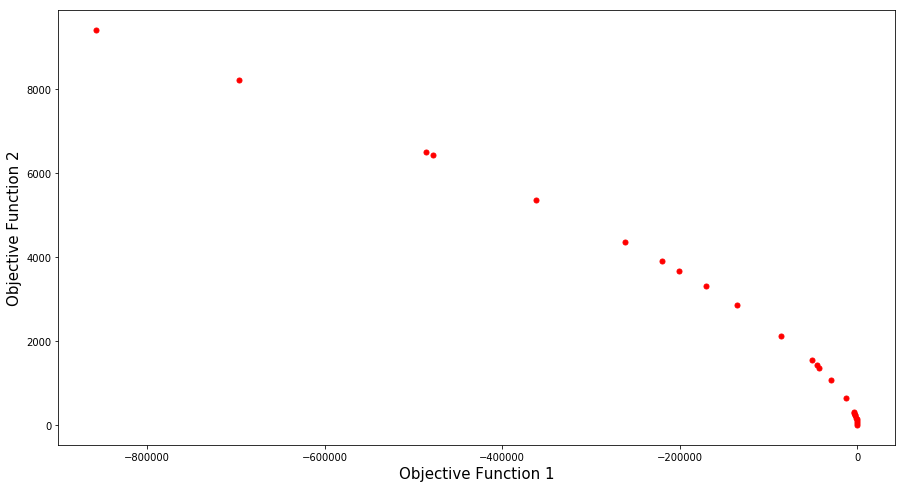

In [30]:
non_dominating_curve_plotter(objective1_values, objective2_values)

In [32]:
print(solution)

[-93.50825371808507, -78.64319300434464, 2.6542539979322157, -63.93316981833132, -34.994586837338375, -8.299802859697266, -5.366501076510843, -35.778178112804, -13.48789920912428, -88.63451784364244, -55.46103700539216, -94.99892741767124, -15.324481561116059, -10.900119888998532, -13.536733465269918, -51.378768873991774, -9.496909741003705, -23.14204165795431, -78.20808920442725, -37.20124012548316, -60.39517980145146, -58.52230583113938, -44.100722060798134, -15.116967365747541, -71.24365515825383]
